In [1]:
import pandas as pd
import requests
import json
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
#unemployment rates in Bay Area Counties
unemploymentdf = pd.read_csv('/Users/baytech11/Downloads/unemployment rate counties.csv')

#original source U.S. BUREAU OF LABOR STATISTICS:
#https://beta.bls.gov/dataViewer/view

#updating ID Values to County names
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060010000000003': 'Alameda'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060130000000003': 'Contra Costa'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060410000000003': 'Marin'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060750000000003': 'San Francisco'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060550000000003': 'Napa'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060950000000003': 'Solano'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060970000000003': 'Sonoma'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060810000000003': 'San Mateo'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060850000000003': 'Santa Clara'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LASST060000000000003': 'California State'})

# writing into the file
unemploymentdf.to_csv("unemployment rate counties.csv", index=False)
print(unemploymentdf)

             Series ID  Year Period     Label  Value
0     California State  2000    M01  2000 Jan    5.0
1     California State  2000    M02  2000 Feb    5.0
2     California State  2000    M03  2000 Mar    5.0
3     California State  2000    M04  2000 Apr    5.0
4     California State  2000    M05  2000 May    5.0
...                ...   ...    ...       ...    ...
2735     Sonoma County  2022    M06  2022 Jun    2.7
2736     Sonoma County  2022    M07  2022 Jul    2.6
2737     Sonoma County  2022    M08  2022 Aug    2.8
2738     Sonoma County  2022    M09  2022 Sep    2.6
2739     Sonoma County  2022    M10  2022 Oct    2.6

[2740 rows x 5 columns]


In [3]:
unemploymentdf.columns

Index(['Series ID', 'Year', 'Period', 'Label', 'Value'], dtype='object')

In [4]:
unemploymentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Series ID  2740 non-null   object 
 1   Year       2740 non-null   int64  
 2   Period     2740 non-null   object 
 3   Label      2740 non-null   object 
 4   Value      2740 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 107.2+ KB


In [5]:
#checking if there is any missing values
unemploymentdf.isnull().values.any()

False

In [6]:
# changing column names for Series ID and 3-Month Net Change, Label to Date:
unemploymentdf.rename(columns = {'Series ID':'County'}, inplace = True)
unemploymentdf.rename(columns = {'3-Month Net Change':'3Month_Net_Change'}, inplace = True)
unemploymentdf.rename(columns = {'Label':'Date'}, inplace = True)

In [7]:
# changing date format
unemploymentdf['Date'] = pd.to_datetime(unemploymentdf['Date']).dt.date
#unemploymentdf['Label']=pd.to_datetime(unemploymentdf['Label'], format = "%Y %b")

In [8]:
unemploymentdf.head()

,County,Year,Period,Date,Value
0,California State,2000,M01,2000-01-01,5.0
1,California State,2000,M02,2000-02-01,5.0
2,California State,2000,M03,2000-03-01,5.0
3,California State,2000,M04,2000-04-01,5.0
4,California State,2000,M05,2000-05-01,5.0


In [9]:
unemploymentdf.info

<bound method DataFrame.info of                 County  Year Period        Date  Value
0     California State  2000    M01  2000-01-01    5.0
1     California State  2000    M02  2000-02-01    5.0
2     California State  2000    M03  2000-03-01    5.0
3     California State  2000    M04  2000-04-01    5.0
4     California State  2000    M05  2000-05-01    5.0
...                ...   ...    ...         ...    ...
2735     Sonoma County  2022    M06  2022-06-01    2.7
2736     Sonoma County  2022    M07  2022-07-01    2.6
2737     Sonoma County  2022    M08  2022-08-01    2.8
2738     Sonoma County  2022    M09  2022-09-01    2.6
2739     Sonoma County  2022    M10  2022-10-01    2.6

[2740 rows x 5 columns]>

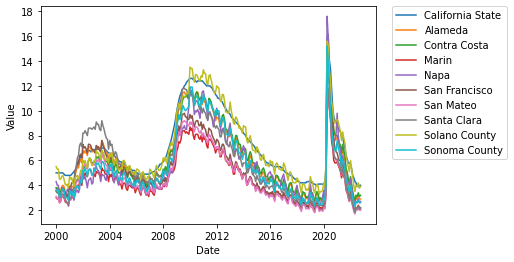

In [10]:
sns.lineplot(x="Date", y="Value", data=unemploymentdf, hue = 'County')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [11]:
#I want to calculate mean and median of unemployment values for each county for the year 2022
unemploymentdf = unemploymentdf.loc[unemploymentdf['Year'].isin([2022])]

In [12]:
#Removing California state results from data fram
counties_data = unemploymentdf.set_index('County')
counties_data.head()

,Year,Period,Date,Value
County,,,,
California State,2022,M01,2022-01-01,5.7
California State,2022,M02,2022-02-01,5.3
California State,2022,M03,2022-03-01,4.8
California State,2022,M04,2022-04-01,4.6
California State,2022,M05,2022-05-01,4.3


In [13]:
counties_data = counties_data.drop('California State')

In [14]:
for col in counties_data:
  print(counties_data[col].unique())

[2022]
['M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'M08' 'M09' 'M10']
[datetime.date(2022, 1, 1) datetime.date(2022, 2, 1)
 datetime.date(2022, 3, 1) datetime.date(2022, 4, 1)
 datetime.date(2022, 5, 1) datetime.date(2022, 6, 1)
 datetime.date(2022, 7, 1) datetime.date(2022, 8, 1)
 datetime.date(2022, 9, 1) datetime.date(2022, 10, 1)]
[4.4 3.8 3.2 2.8 2.5 3.  2.9 3.1 4.7 4.1 3.5 2.7 3.4 2.4 2.1 1.8 2.2 4.6
 3.9 2.3 2.6 1.9 1.7 2.  3.3 6.  5.3 4.  4.2]


In [15]:
#Calculating mean and meadian for each county
counties_data ['avg_rate'] = counties_data.groupby('County')['Value'].agg(np.mean)


In [16]:
counties_data.info

<bound method DataFrame.info of                Year Period        Date  Value  avg_rate
County                                                 
Alameda        2022    M01  2022-01-01    4.4      3.15
Alameda        2022    M02  2022-02-01    3.8      3.15
Alameda        2022    M03  2022-03-01    3.2      3.15
Alameda        2022    M04  2022-04-01    2.8      3.15
Alameda        2022    M05  2022-05-01    2.5      3.15
...             ...    ...         ...    ...       ...
Sonoma County  2022    M06  2022-06-01    2.7      2.87
Sonoma County  2022    M07  2022-07-01    2.6      2.87
Sonoma County  2022    M08  2022-08-01    2.8      2.87
Sonoma County  2022    M09  2022-09-01    2.6      2.87
Sonoma County  2022    M10  2022-10-01    2.6      2.87

[90 rows x 5 columns]>

In [17]:
counties_data.head()

,Year,Period,Date,Value,avg_rate
County,,,,,
Alameda,2022,M01,2022-01-01,4.4,3.15
Alameda,2022,M02,2022-02-01,3.8,3.15
Alameda,2022,M03,2022-03-01,3.2,3.15
Alameda,2022,M04,2022-04-01,2.8,3.15
Alameda,2022,M05,2022-05-01,2.5,3.15


In [18]:
counties_data = counties_data.reset_index()

In [19]:
counties_data.head()

,County,Year,Period,Date,Value,avg_rate
0,Alameda,2022,M01,2022-01-01,4.4,3.15
1,Alameda,2022,M02,2022-02-01,3.8,3.15
2,Alameda,2022,M03,2022-03-01,3.2,3.15
3,Alameda,2022,M04,2022-04-01,2.8,3.15
4,Alameda,2022,M05,2022-05-01,2.5,3.15


In [20]:
counties_unemployment = counties_data[['County', 'avg_rate']].copy()

print(counties_unemployment)

           County  avg_rate
0         Alameda      3.15
1         Alameda      3.15
2         Alameda      3.15
3         Alameda      3.15
4         Alameda      3.15
..            ...       ...
85  Sonoma County      2.87
86  Sonoma County      2.87
87  Sonoma County      2.87
88  Sonoma County      2.87
89  Sonoma County      2.87

[90 rows x 2 columns]


In [21]:
counties_unemployment = counties_unemployment.drop_duplicates()

In [22]:
print(counties_unemployment)

           County  avg_rate
0         Alameda      3.15
10   Contra Costa      3.41
20          Marin      2.34
30           Napa      3.03
40  San Francisco      2.39
50      San Mateo      2.20
60    Santa Clara      2.35
70  Solano County      4.32
80  Sonoma County      2.87


Text(0.5, 1.0, 'Unemployment Rates (%) in Bay Area Counties (Year of 2022)')

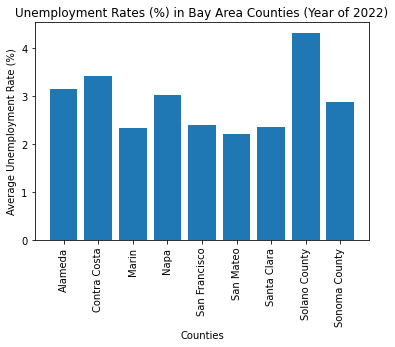

In [23]:
plt.bar('County', height = 'avg_rate',data=counties_unemployment)
plt.xticks(rotation=90)
plt.xlabel('Counties')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Unemployment Rates (%) in Bay Area Counties (Year of 2022)')

In [24]:
counties_unemployment.to_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone Project/prepared data/unemployment_data', index=False)